In [2]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
import csv
import math
from csv import writer

In [3]:

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

    

#Video
vidcoordinates = []
vidvalue = []
vidnames=[]
namessubjects = ['Marcus','Andrei','Elsa','Nathalie','Oskar','Viktor']
for i in range(2):
    for j in namessubjects:
        for k in range(10):
                vidvalue.append(i)
                vidnames.append(f'Armataxi {i} - {j} - {k+1}.mp4')
print(vidnames)
#vidnamess = ['Pares i arm right 3 - 1080 50fps - 1_Trim.mp4', 'Pares i arm right 3 - 1080 50fps - 2_Trim.mp4']
#vidnamess = ['nataliepeka1_1_20.mp4', 'nataliepeka1_4_20.mp4']
counter = 0
for i in vidnames:
    print(i)
    if counter == 10:
        counter = 0
    counter += 1
    if "Elsa" in i or "Oskar" in i:
        if counter <= 5:
            counter2 = counter + 5
        if counter > 5:
            counter2 = counter - 5
    else:
        counter2 = counter
    print(counter2)
    allpoints = []
    cap = cv2.VideoCapture(i)
    with mp_pose.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as pose:
      while cap.isOpened():
        success, image = cap.read()
        if not success:
          print("Ignoring empty camera frame.")
          # If loading a video, use 'break' instead of 'continue'.
          break

        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image)

        # Draw the pose annotation on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        # Flip the image horizontally for a selfie-view display.
        image_hight, image_width, _ = image.shape
        x_coordinate_left_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_INDEX].x * image_width
        y_coordinate_left_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_INDEX].y * image_hight
        x_coordinate_right_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_INDEX].x * image_width
        y_coordinate_right_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_INDEX].y * image_hight
        x_coordinate_nose = results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width
        y_coordinate_nose = results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight
        #cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
        if cv2.waitKey(5) & 0xFF == 27:
          break
        if x_coordinate_left_index is not None and x_coordinate_nose is not None and counter2 <= 5:
                dist = math.sqrt((y_coordinate_left_index-y_coordinate_nose)**2+(x_coordinate_left_index-x_coordinate_nose)**2)
                allpoints.append(dist) 
        if x_coordinate_right_index is not None and x_coordinate_nose is not None and counter2 > 5:
                dist = math.sqrt((y_coordinate_right_index-y_coordinate_nose)**2+(x_coordinate_right_index-x_coordinate_nose)**2)
                allpoints.append(dist)
    with open('vidcoordinates_mediapipe_ataxi_arm.csv', 'a') as f_object:
        writer_object = writer(f_object)
        writer_object.writerow(allpoints)
        f_object.close()
#print(vidcoordinates)

['Armataxi 0 - Marcus - 1.mp4', 'Armataxi 0 - Marcus - 2.mp4', 'Armataxi 0 - Marcus - 3.mp4', 'Armataxi 0 - Marcus - 4.mp4', 'Armataxi 0 - Marcus - 5.mp4', 'Armataxi 0 - Marcus - 6.mp4', 'Armataxi 0 - Marcus - 7.mp4', 'Armataxi 0 - Marcus - 8.mp4', 'Armataxi 0 - Marcus - 9.mp4', 'Armataxi 0 - Marcus - 10.mp4', 'Armataxi 0 - Andrei - 1.mp4', 'Armataxi 0 - Andrei - 2.mp4', 'Armataxi 0 - Andrei - 3.mp4', 'Armataxi 0 - Andrei - 4.mp4', 'Armataxi 0 - Andrei - 5.mp4', 'Armataxi 0 - Andrei - 6.mp4', 'Armataxi 0 - Andrei - 7.mp4', 'Armataxi 0 - Andrei - 8.mp4', 'Armataxi 0 - Andrei - 9.mp4', 'Armataxi 0 - Andrei - 10.mp4', 'Armataxi 0 - Elsa - 1.mp4', 'Armataxi 0 - Elsa - 2.mp4', 'Armataxi 0 - Elsa - 3.mp4', 'Armataxi 0 - Elsa - 4.mp4', 'Armataxi 0 - Elsa - 5.mp4', 'Armataxi 0 - Elsa - 6.mp4', 'Armataxi 0 - Elsa - 7.mp4', 'Armataxi 0 - Elsa - 8.mp4', 'Armataxi 0 - Elsa - 9.mp4', 'Armataxi 0 - Elsa - 10.mp4', 'Armataxi 0 - Nathalie - 1.mp4', 'Armataxi 0 - Nathalie - 2.mp4', 'Armataxi 0 - Nathal

Ignoring empty camera frame.
Armataxi 1 - Andrei - 8.mp4
8
Ignoring empty camera frame.
Armataxi 1 - Andrei - 9.mp4
9
Ignoring empty camera frame.
Armataxi 1 - Andrei - 10.mp4
10
Ignoring empty camera frame.
Armataxi 1 - Elsa - 1.mp4
6
Ignoring empty camera frame.
Armataxi 1 - Elsa - 2.mp4
7
Ignoring empty camera frame.
Armataxi 1 - Elsa - 3.mp4
8
Ignoring empty camera frame.
Armataxi 1 - Elsa - 4.mp4
9
Ignoring empty camera frame.
Armataxi 1 - Elsa - 5.mp4
10
Ignoring empty camera frame.
Armataxi 1 - Elsa - 6.mp4
1
Ignoring empty camera frame.
Armataxi 1 - Elsa - 7.mp4
2
Ignoring empty camera frame.
Armataxi 1 - Elsa - 8.mp4
3
Ignoring empty camera frame.
Armataxi 1 - Elsa - 9.mp4
4
Ignoring empty camera frame.
Armataxi 1 - Elsa - 10.mp4
5
Ignoring empty camera frame.
Armataxi 1 - Nathalie - 1.mp4
1
Ignoring empty camera frame.
Armataxi 1 - Nathalie - 2.mp4
2
Ignoring empty camera frame.
Armataxi 1 - Nathalie - 3.mp4
3
Ignoring empty camera frame.
Armataxi 1 - Nathalie - 4.mp4
4
Ignor

In [1]:
#From csv to list
#Börja med att köra denna när du har 'vidcoordinates.csv' i samma mapp som denna fil

import csv
import cv2 as cv
import matplotlib.pyplot as plt
import csv
from csv import writer

with open('vidcoordinates_mediapipe_ataxi_arm.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

newbetterlist = []
for i in data:
    if i:
        newbetterlist.append(i)
print(newbetterlist)

[['400.6684676948818', '407.12408468549097', '408.2696746170394', '409.3262495963445', '410.0375804682796', '409.4429939382945', '409.67146120782894', '410.21149936785906', '410.5290725133895', '411.2032402459182', '412.0625109409928', '412.9196697268849', '414.169380843576', '414.27380786223915', '414.1877623637336', '414.5562982470836', '414.90005344542413', '415.08304808604083', '415.43491644797774', '415.6023575157264', '415.5596232267919', '415.72700494421196', '415.8300678020845', '416.043590492489', '416.3911908600374', '416.38302843589406', '416.4387161792678', '416.4456914737556', '416.42661728681225', '416.42862217191146', '416.4533927147339', '416.4570344944715', '416.3510307299837', '416.36267556460535', '416.3661606235133', '416.40639650021', '416.3367278468681', '416.7716078071761', '416.73717938234273', '416.9042243733296', '418.0216665721639', '419.46079306834787', '419.97516460083034', '420.1277694322016', '420.1736319506504', '419.8006038436971', '419.44720789256337',

In [2]:
vidcoordinates = newbetterlist

In [3]:
#Make strings into ints

for i in range(len(vidcoordinates)):
    for j in range(len(vidcoordinates[i])):
        vidcoordinates[i][j] = float(vidcoordinates[i][j])
print(vidcoordinates)

[[400.6684676948818, 407.12408468549097, 408.2696746170394, 409.3262495963445, 410.0375804682796, 409.4429939382945, 409.67146120782894, 410.21149936785906, 410.5290725133895, 411.2032402459182, 412.0625109409928, 412.9196697268849, 414.169380843576, 414.27380786223915, 414.1877623637336, 414.5562982470836, 414.90005344542413, 415.08304808604083, 415.43491644797774, 415.6023575157264, 415.5596232267919, 415.72700494421196, 415.8300678020845, 416.043590492489, 416.3911908600374, 416.38302843589406, 416.4387161792678, 416.4456914737556, 416.42661728681225, 416.42862217191146, 416.4533927147339, 416.4570344944715, 416.3510307299837, 416.36267556460535, 416.3661606235133, 416.40639650021, 416.3367278468681, 416.7716078071761, 416.73717938234273, 416.9042243733296, 418.0216665721639, 419.46079306834787, 419.97516460083034, 420.1277694322016, 420.1736319506504, 419.8006038436971, 419.44720789256337, 419.18440198840943, 419.0357138632229, 418.9056182458529, 418.82223685455557, 418.71326730574

In [4]:
#Append zeroes to make same size

lengths = []
for i in vidcoordinates:
    lengths.append(len(i))
print(lengths)
print(max(lengths))

for i in vidcoordinates:
    while len(i) < max(lengths):
        i.append(0)
print(vidcoordinates)

[245, 231, 230, 220, 199, 193, 179, 182, 169, 170, 502, 555, 590, 570, 586, 569, 585, 657, 666, 615, 160, 170, 223, 229, 229, 189, 188, 208, 205, 205, 195, 178, 189, 181, 174, 155, 164, 191, 166, 149, 304, 277, 299, 300, 291, 315, 279, 289, 280, 294, 317, 252, 307, 320, 355, 344, 323, 306, 333, 349, 410, 416, 414, 403, 381, 423, 369, 464, 441, 495, 736, 808, 788, 672, 770, 817, 855, 902, 847, 921, 275, 288, 289, 264, 285, 286, 292, 313, 303, 290, 299, 262, 299, 235, 255, 259, 243, 286, 225, 336, 463, 508, 455, 459, 518, 474, 406, 424, 473, 416, 408, 478, 501, 456, 466, 411, 406, 484, 495, 468]
921
[[400.6684676948818, 407.12408468549097, 408.2696746170394, 409.3262495963445, 410.0375804682796, 409.4429939382945, 409.67146120782894, 410.21149936785906, 410.5290725133895, 411.2032402459182, 412.0625109409928, 412.9196697268849, 414.169380843576, 414.27380786223915, 414.1877623637336, 414.5562982470836, 414.90005344542413, 415.08304808604083, 415.43491644797774, 415.6023575157264, 415.559

In [5]:
namessubjects = ['Marcus','Andrei','Elsa','Nathalie','Oskar','Viktor']
vidvalue = []
for i in range(2):
    for j in namessubjects:
        for k in range(10):
                vidvalue.append(i)
print(len(vidvalue))


120


0


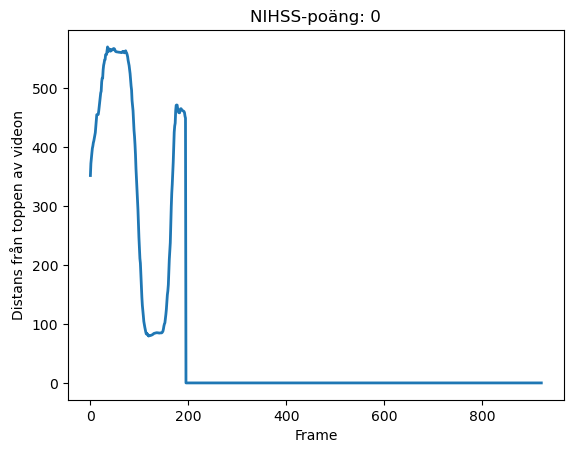

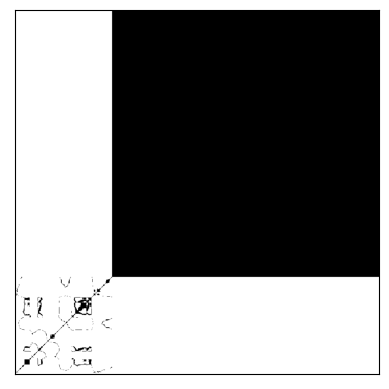

(1, 921, 921)


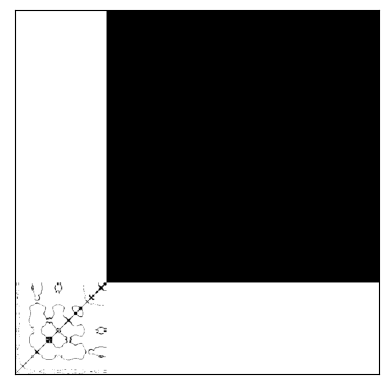

(1, 921, 921)


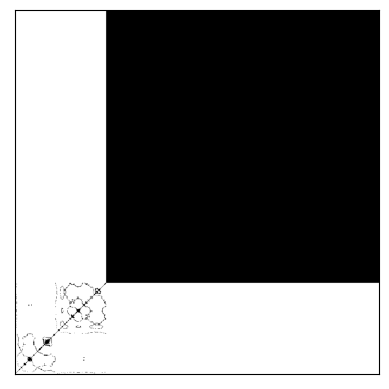

(1, 921, 921)


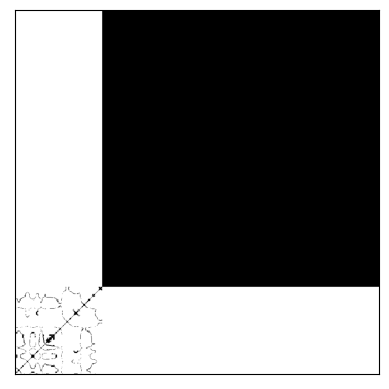

(1, 921, 921)


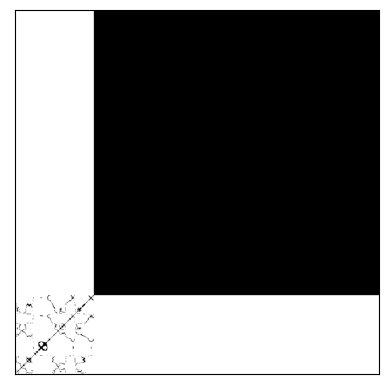

(1, 921, 921)


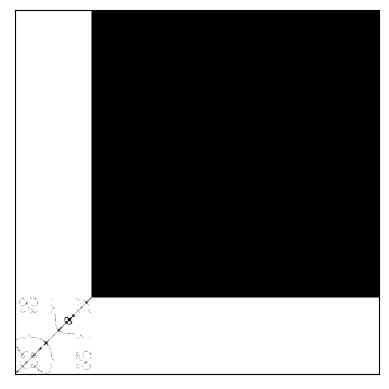

(1, 921, 921)


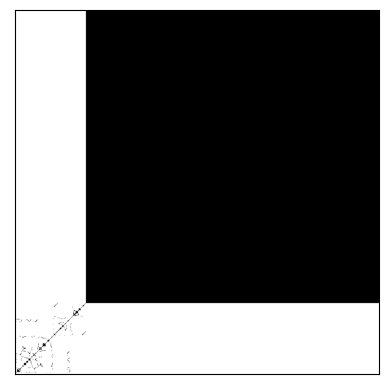

(1, 921, 921)


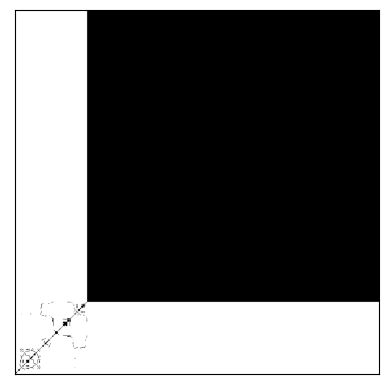

(1, 921, 921)


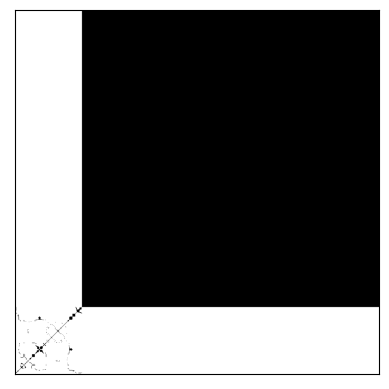

(1, 921, 921)


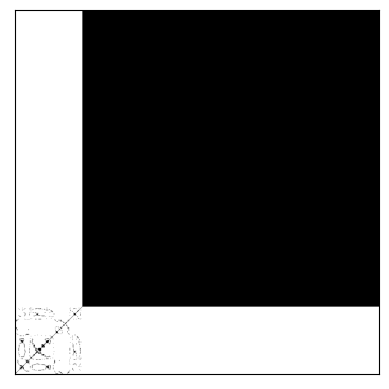

(1, 921, 921)


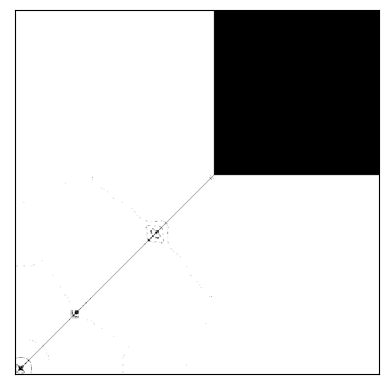

(1, 921, 921)


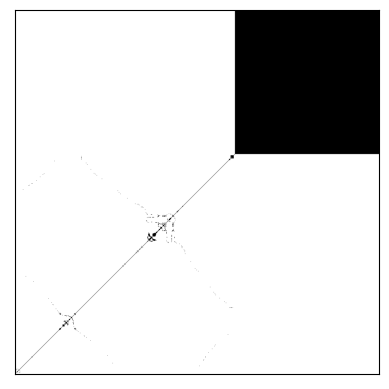

(1, 921, 921)


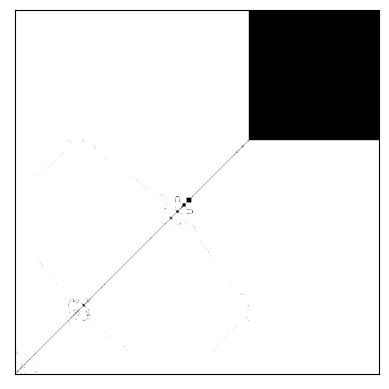

(1, 921, 921)


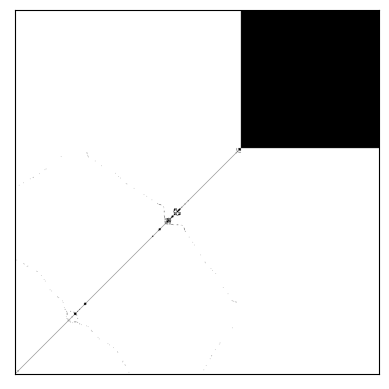

(1, 921, 921)


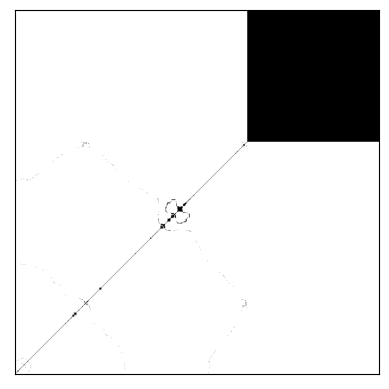

(1, 921, 921)


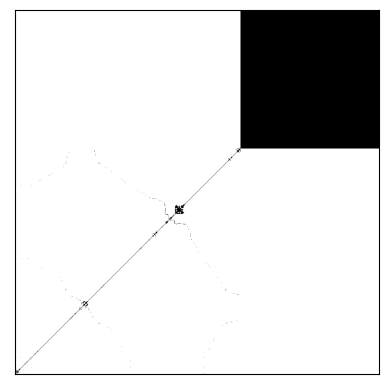

(1, 921, 921)


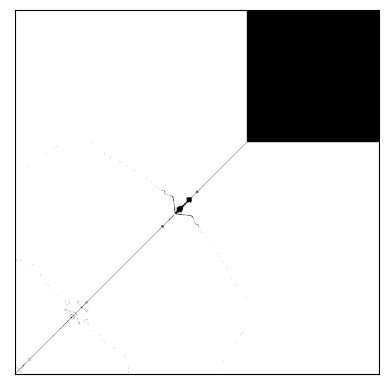

(1, 921, 921)


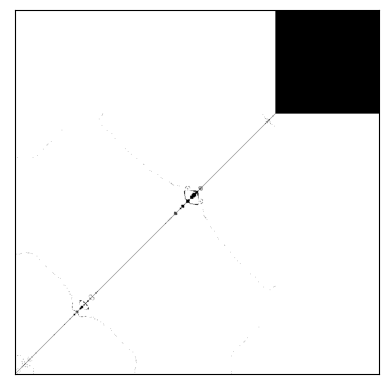

(1, 921, 921)


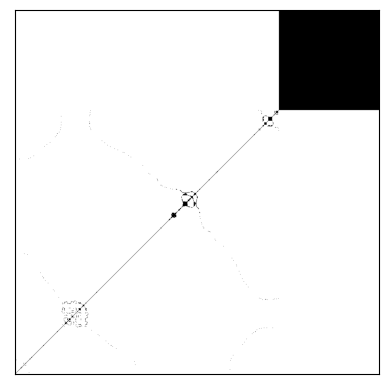

(1, 921, 921)


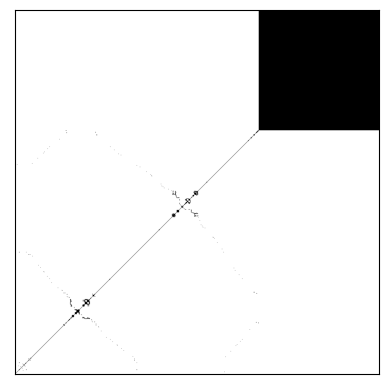

(1, 921, 921)


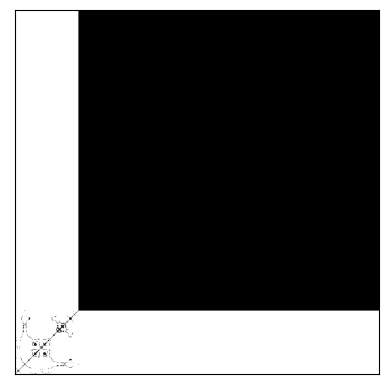

(1, 921, 921)


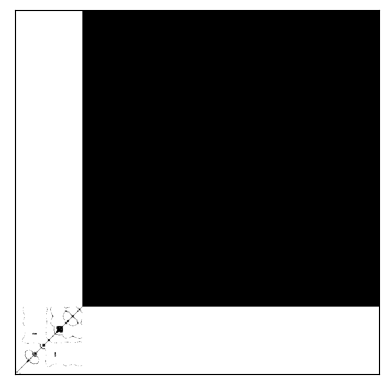

(1, 921, 921)


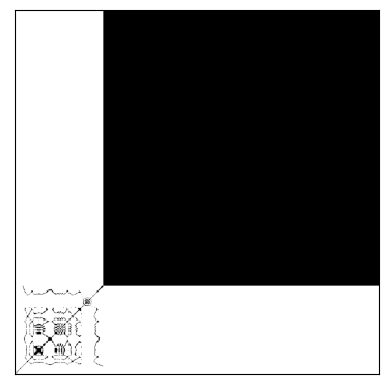

(1, 921, 921)


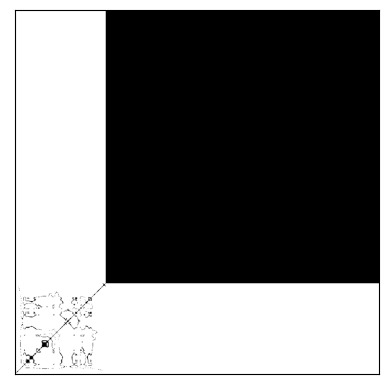

(1, 921, 921)


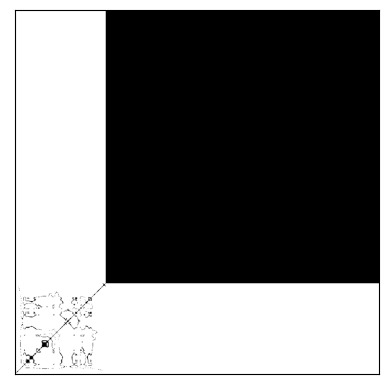

(1, 921, 921)


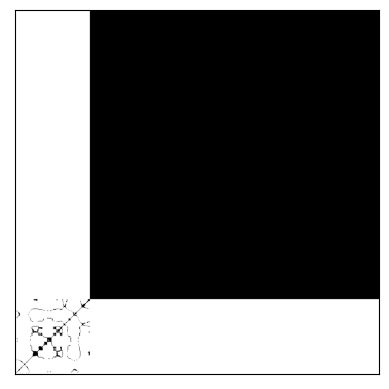

(1, 921, 921)


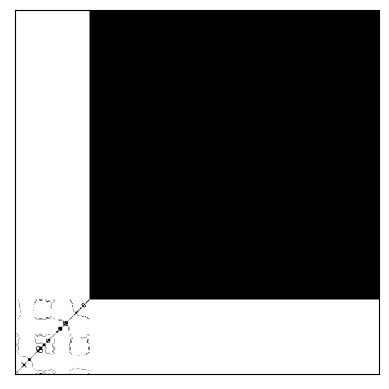

(1, 921, 921)


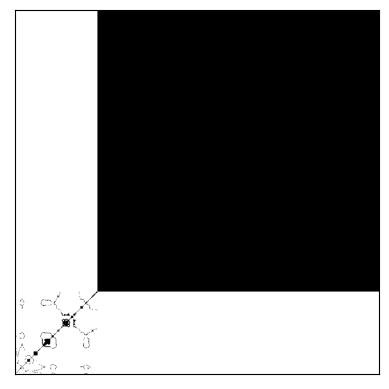

(1, 921, 921)


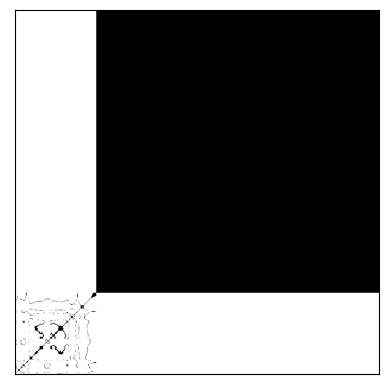

(1, 921, 921)


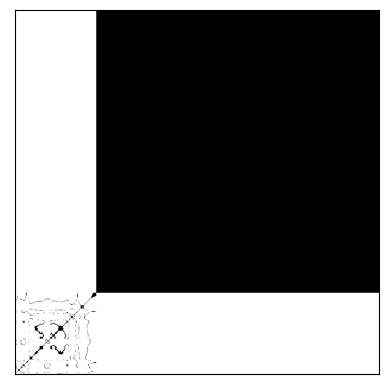

(1, 921, 921)


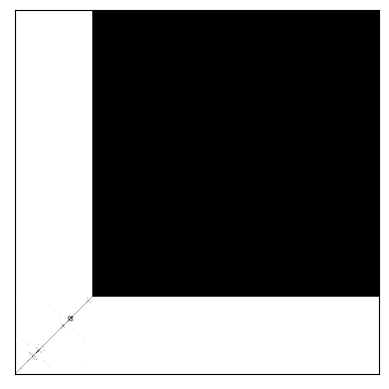

(1, 921, 921)


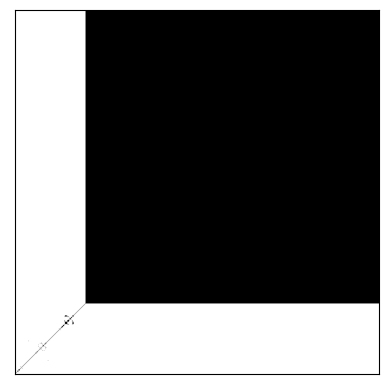

(1, 921, 921)


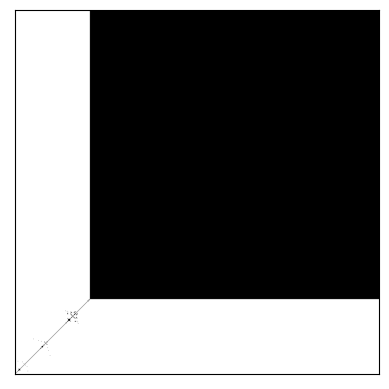

(1, 921, 921)


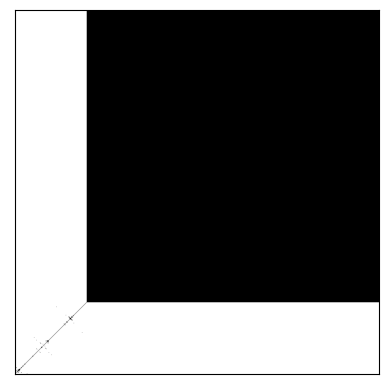

(1, 921, 921)


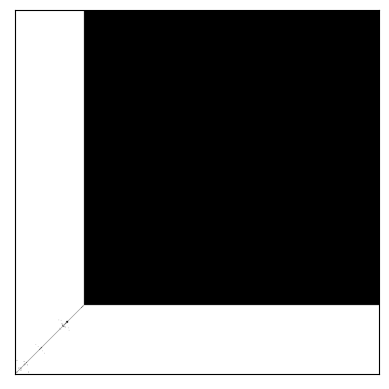

(1, 921, 921)


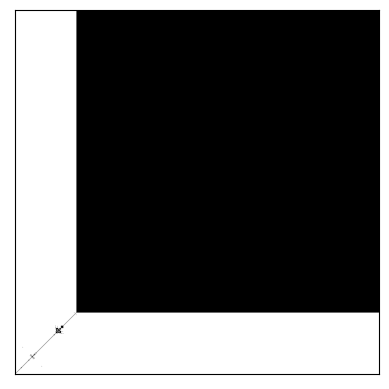

(1, 921, 921)


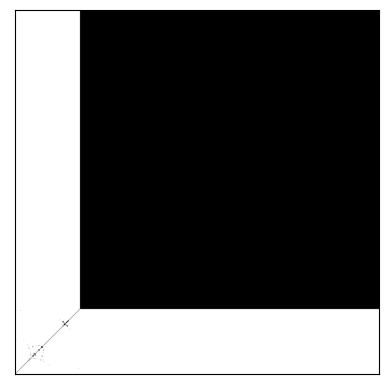

(1, 921, 921)


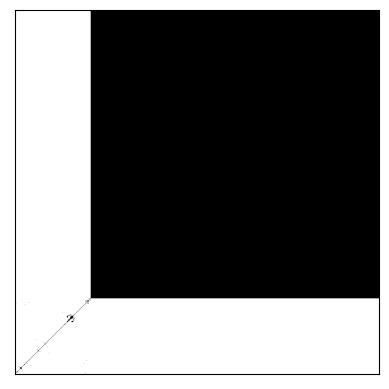

(1, 921, 921)


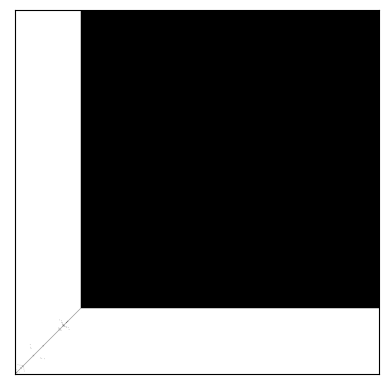

(1, 921, 921)


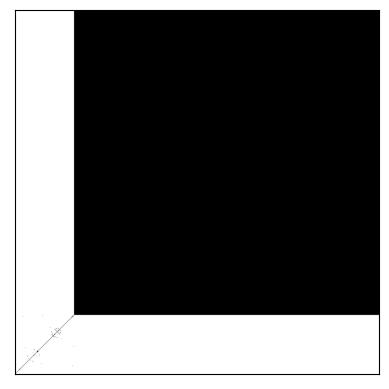

(1, 921, 921)


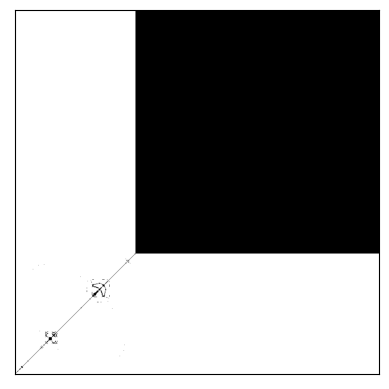

(1, 921, 921)


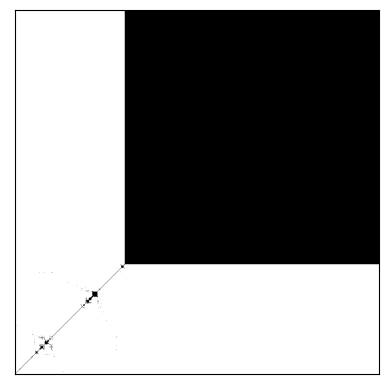

(1, 921, 921)


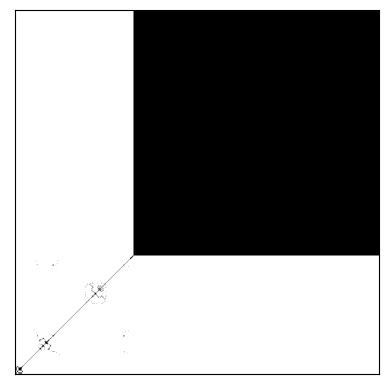

(1, 921, 921)


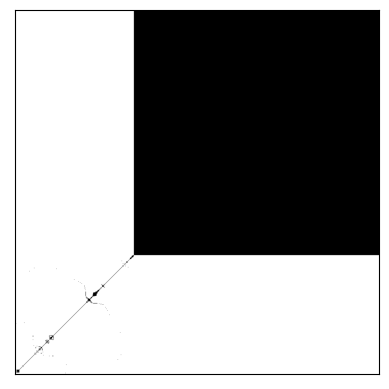

(1, 921, 921)


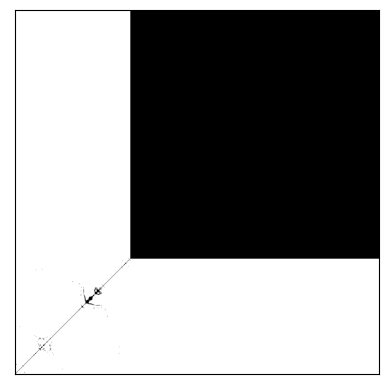

(1, 921, 921)


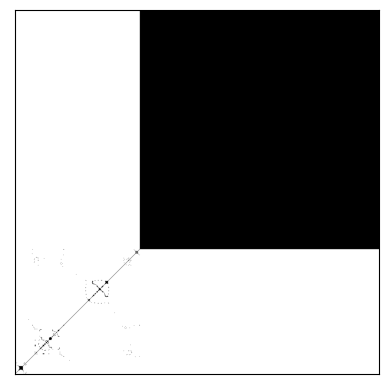

(1, 921, 921)


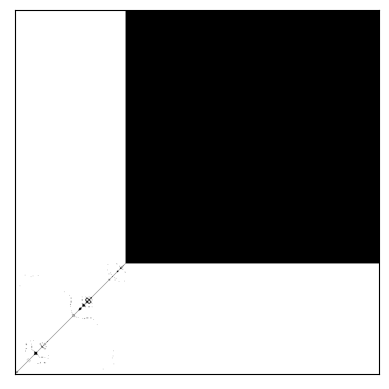

(1, 921, 921)


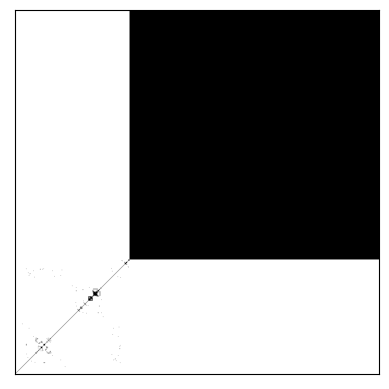

(1, 921, 921)


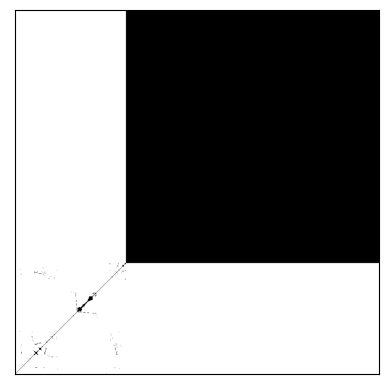

(1, 921, 921)


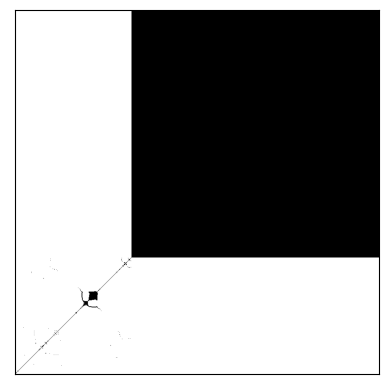

(1, 921, 921)


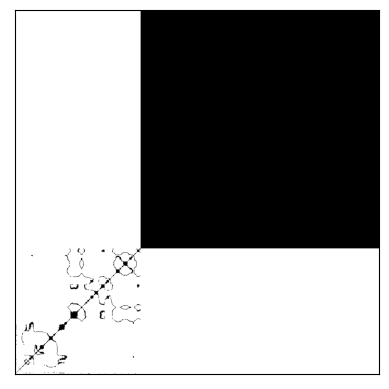

(1, 921, 921)


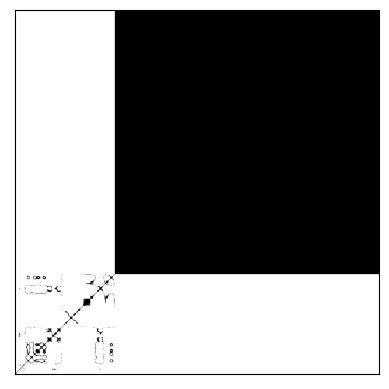

(1, 921, 921)


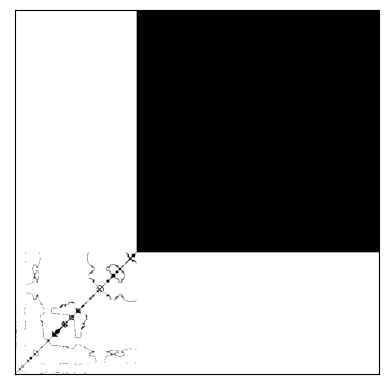

(1, 921, 921)


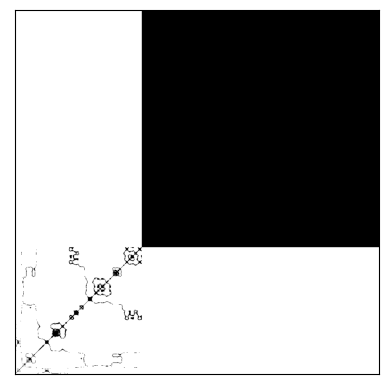

(1, 921, 921)


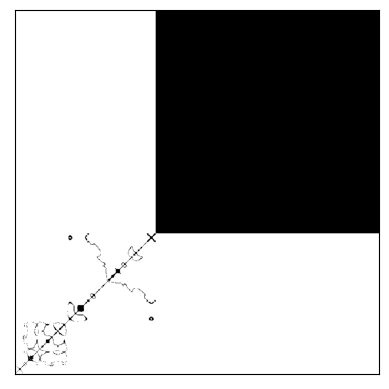

(1, 921, 921)


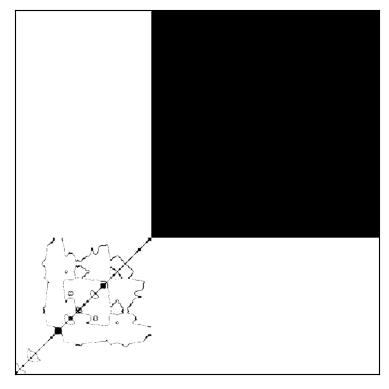

(1, 921, 921)


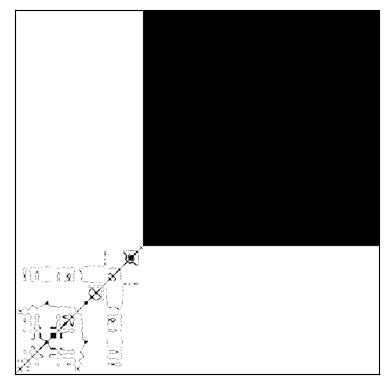

(1, 921, 921)


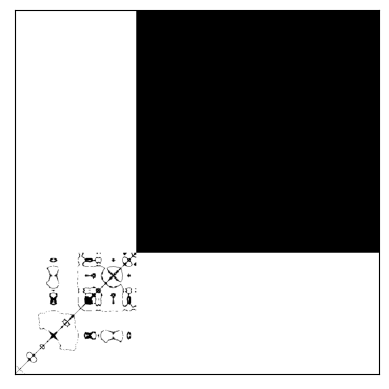

(1, 921, 921)


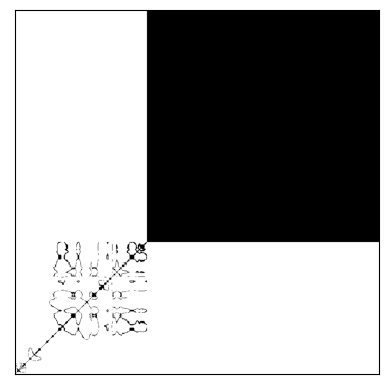

(1, 921, 921)


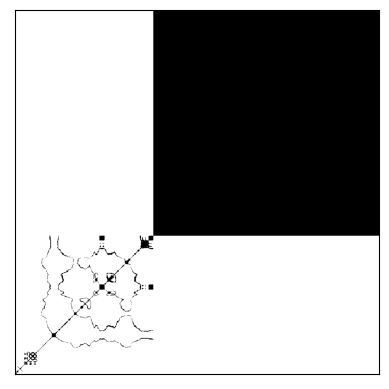

(1, 921, 921)


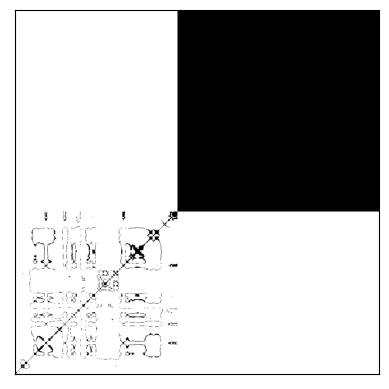

(1, 921, 921)


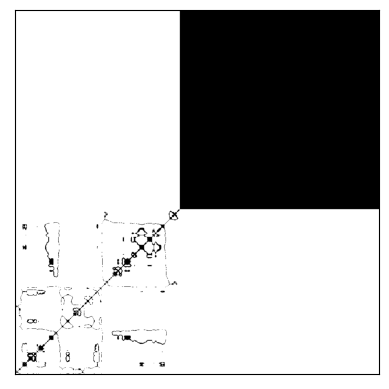

(1, 921, 921)


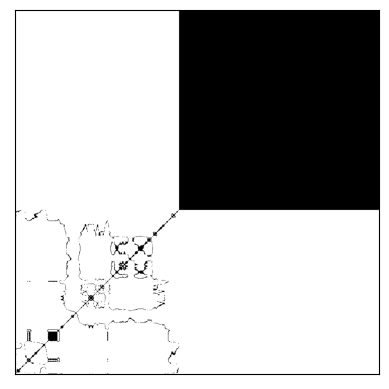

(1, 921, 921)


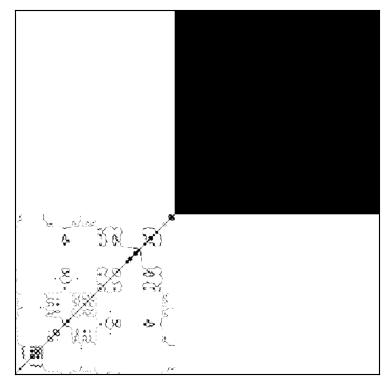

(1, 921, 921)


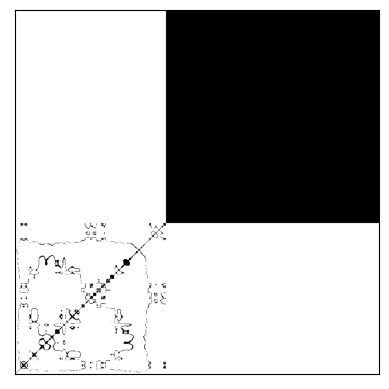

(1, 921, 921)


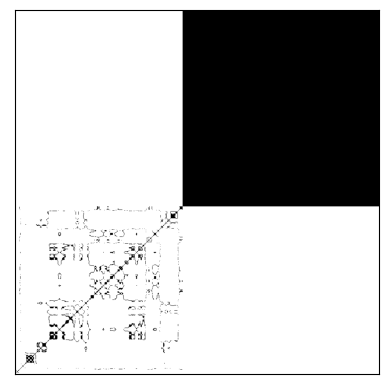

(1, 921, 921)


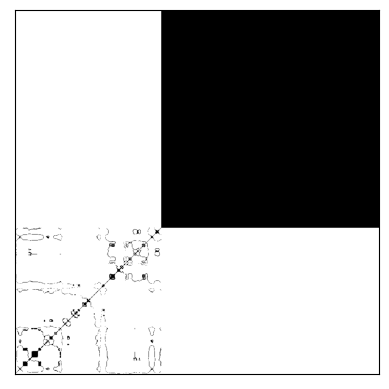

(1, 921, 921)


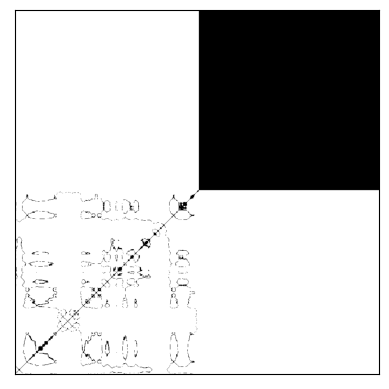

(1, 921, 921)


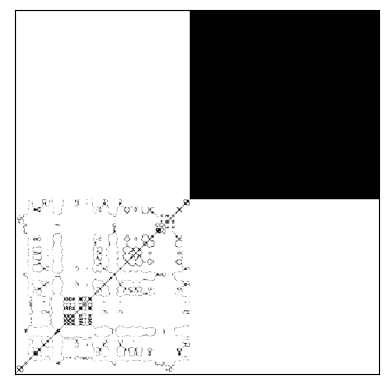

(1, 921, 921)


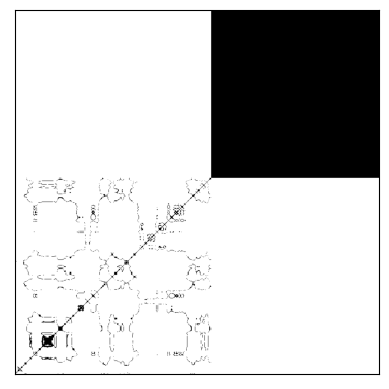

(1, 921, 921)


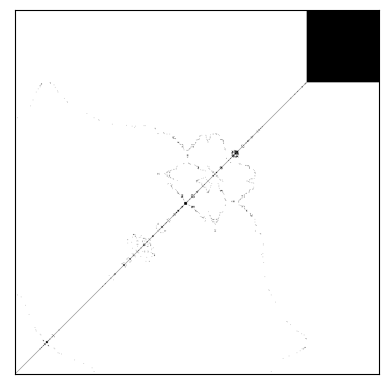

(1, 921, 921)


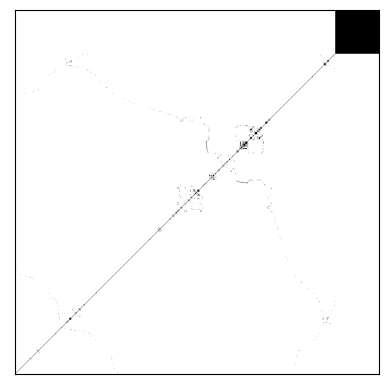

(1, 921, 921)


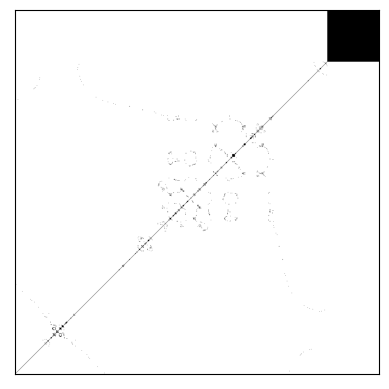

(1, 921, 921)


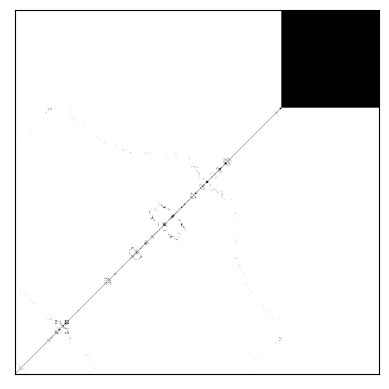

(1, 921, 921)


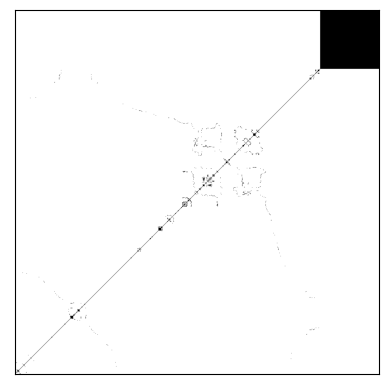

(1, 921, 921)


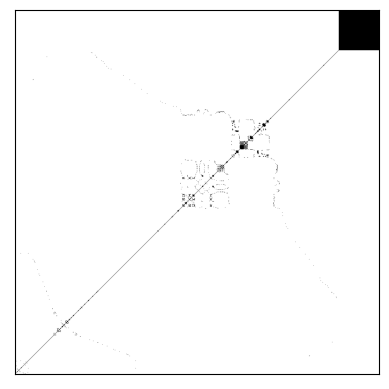

(1, 921, 921)


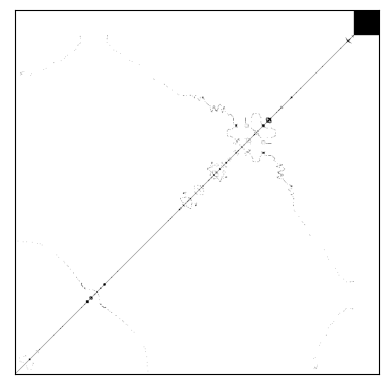

(1, 921, 921)


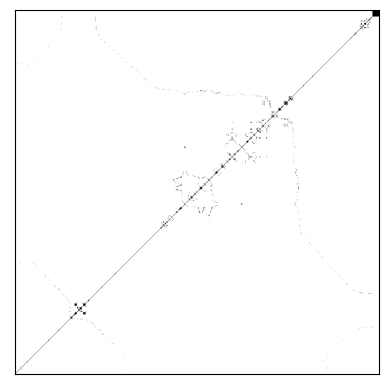

(1, 921, 921)


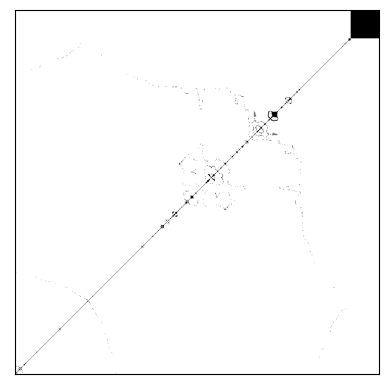

(1, 921, 921)


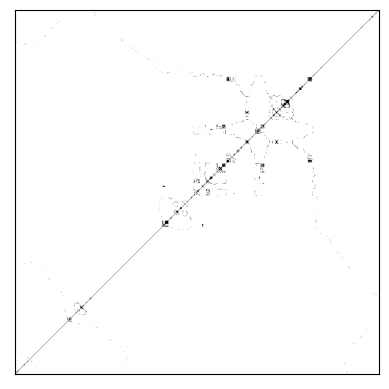

(1, 921, 921)


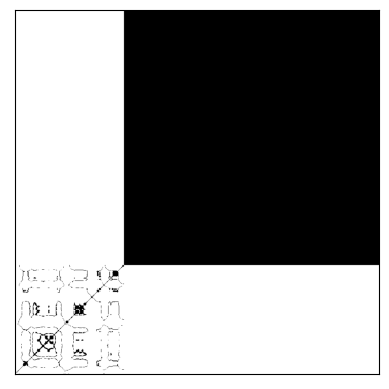

(1, 921, 921)


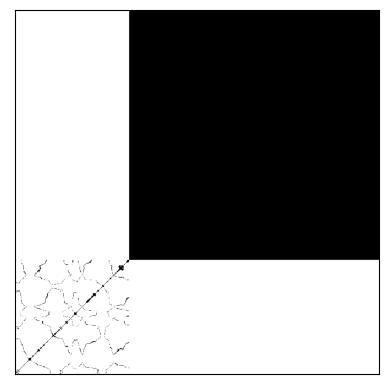

(1, 921, 921)


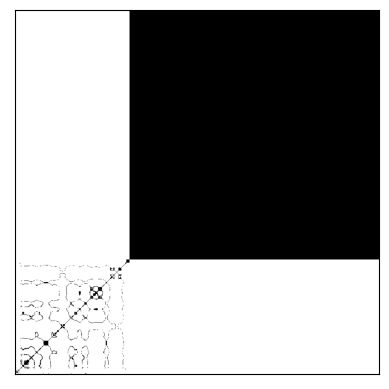

(1, 921, 921)


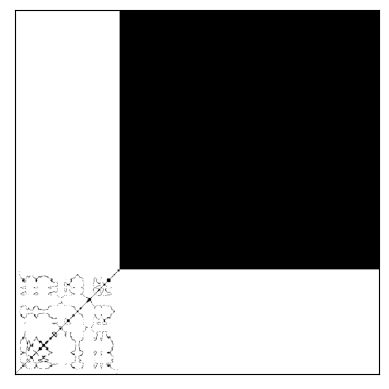

(1, 921, 921)


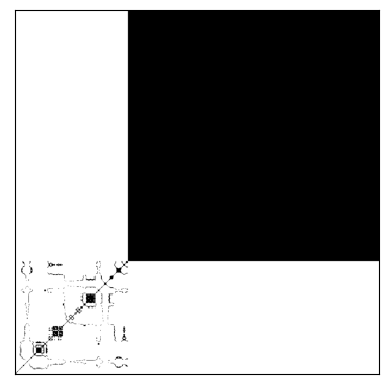

(1, 921, 921)


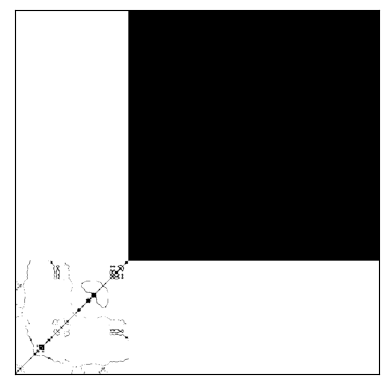

(1, 921, 921)


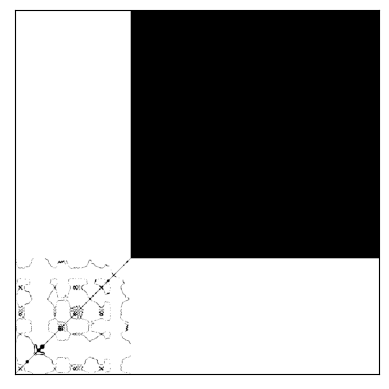

(1, 921, 921)


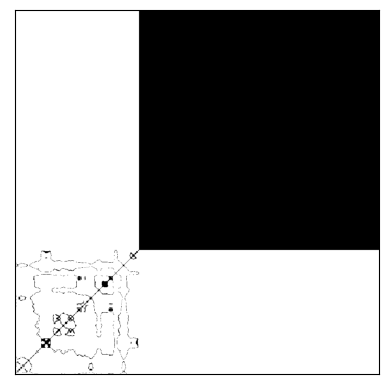

(1, 921, 921)


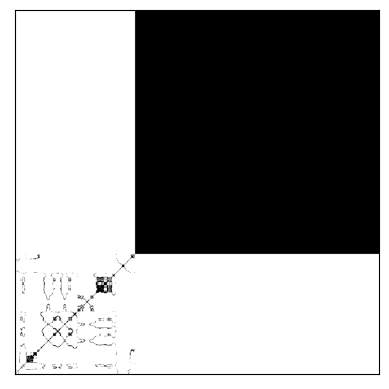

(1, 921, 921)


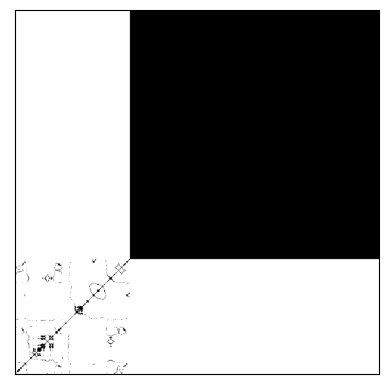

(1, 921, 921)


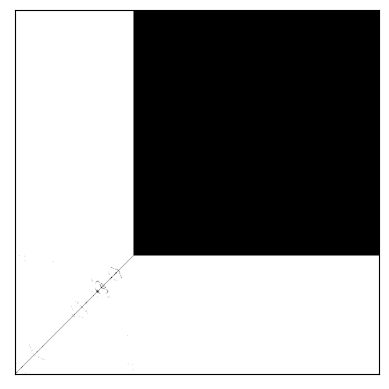

(1, 921, 921)


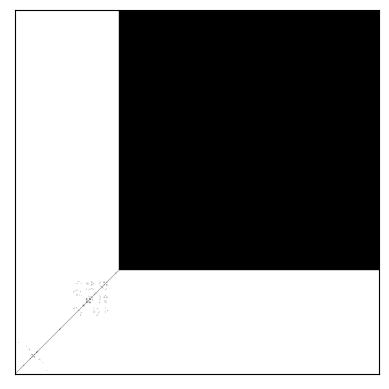

(1, 921, 921)


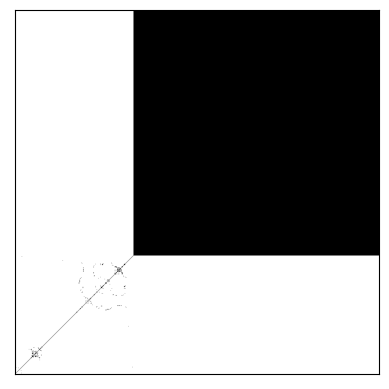

(1, 921, 921)


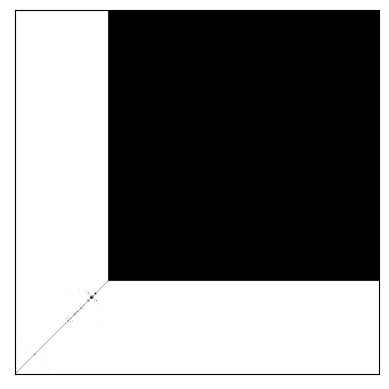

(1, 921, 921)


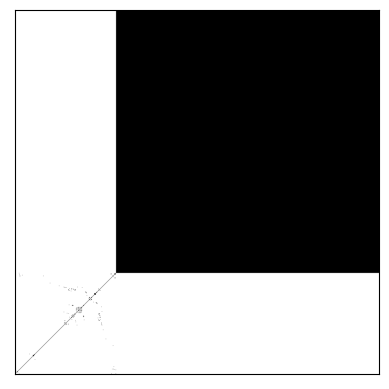

(1, 921, 921)


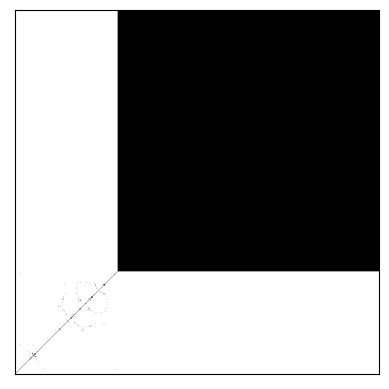

(1, 921, 921)


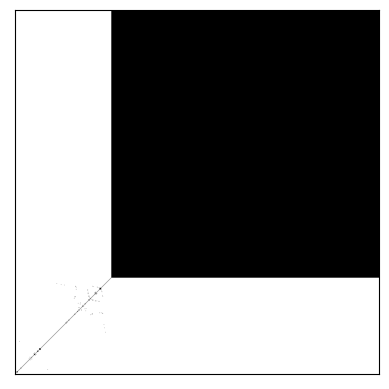

(1, 921, 921)


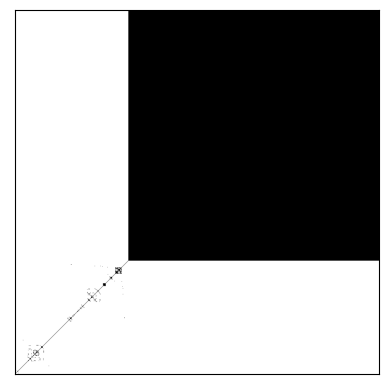

(1, 921, 921)


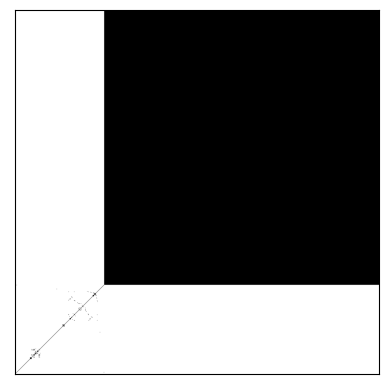

(1, 921, 921)


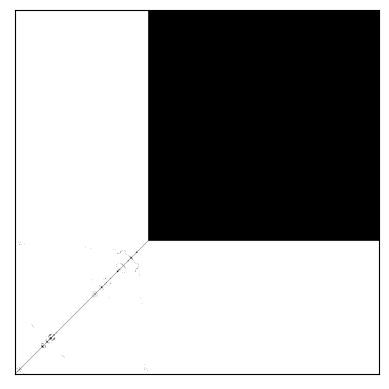

(1, 921, 921)


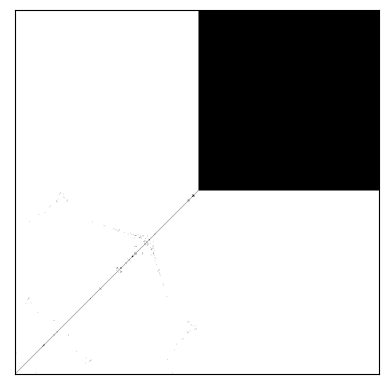

(1, 921, 921)


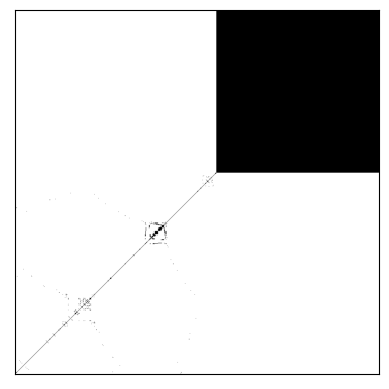

(1, 921, 921)


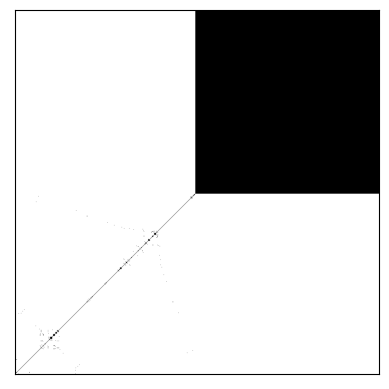

(1, 921, 921)


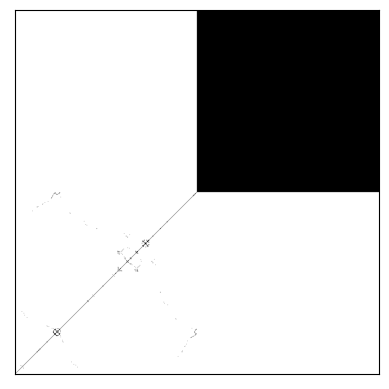

(1, 921, 921)


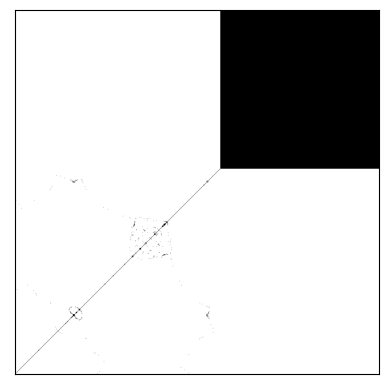

(1, 921, 921)


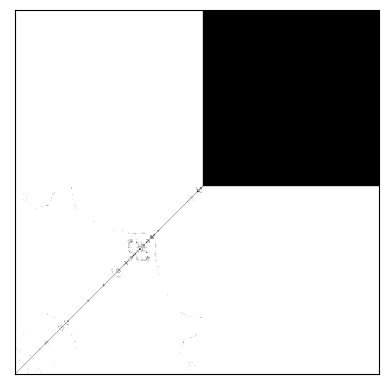

(1, 921, 921)


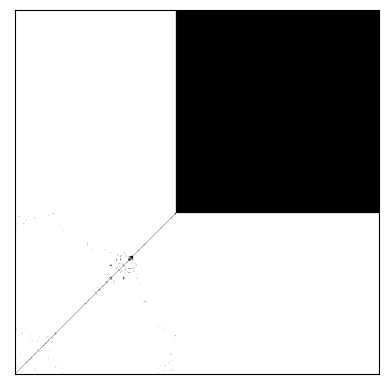

(1, 921, 921)


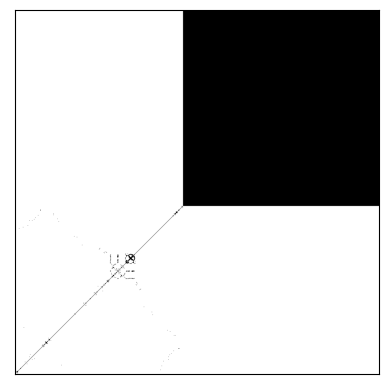

(1, 921, 921)


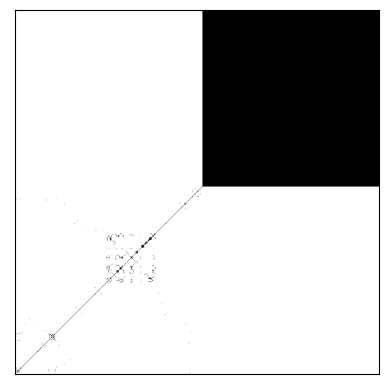

(1, 921, 921)


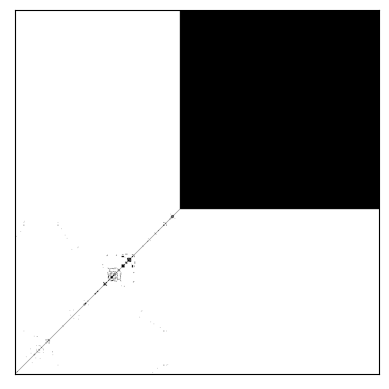

(1, 921, 921)


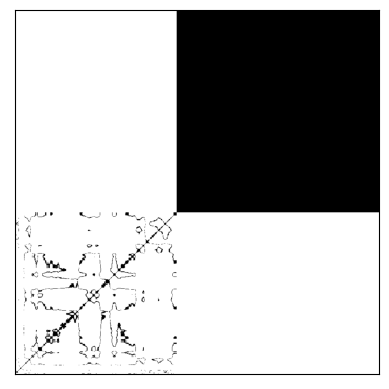

(1, 921, 921)


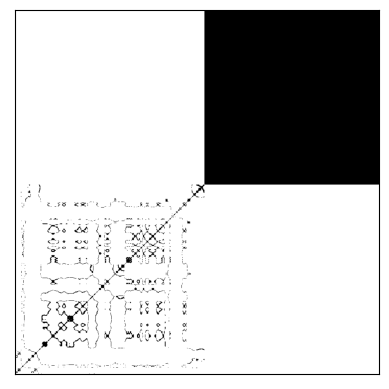

(1, 921, 921)


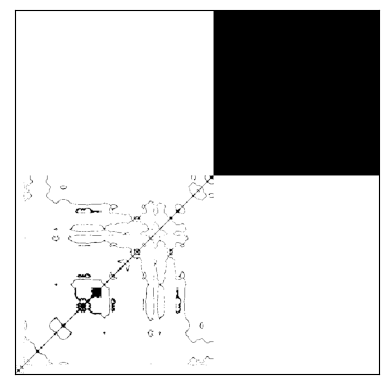

(1, 921, 921)


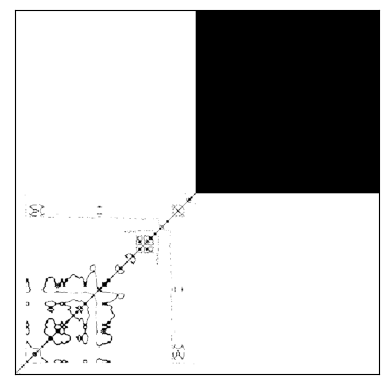

(1, 921, 921)


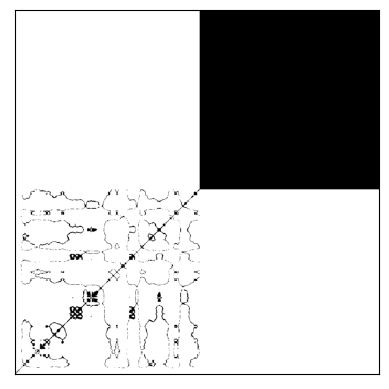

(1, 921, 921)


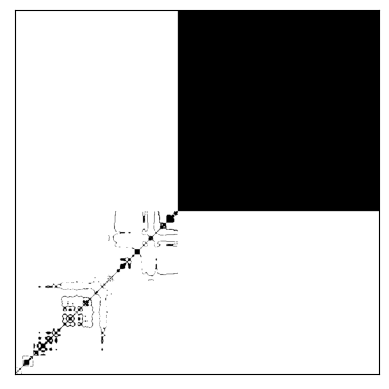

(1, 921, 921)


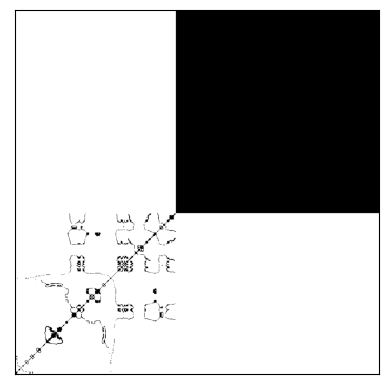

(1, 921, 921)


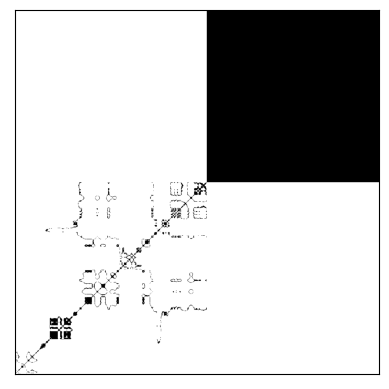

(1, 921, 921)


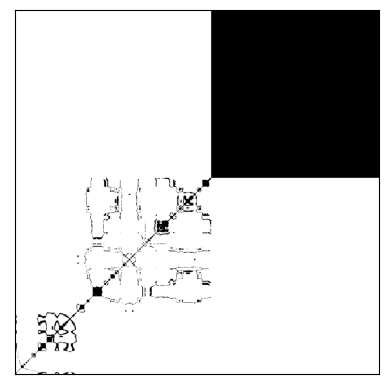

(1, 921, 921)


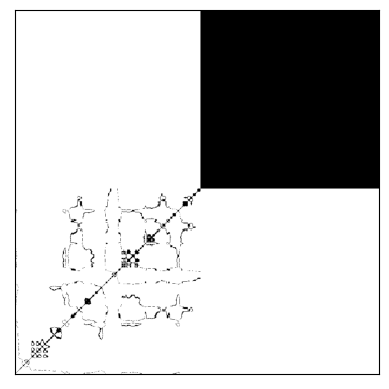

(1, 921, 921)


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from pyts.image import RecurrencePlot

y = np.linspace(0,921,921)

# Create a toy time series using the sine function
#time_points = np.linspace(0, 4 * np.pi, 1000)
#x = np.sin(time_points)

a = 30

x = vidcoordinates[a]

print(vidvalue[a])

X = np.array([x])

plt.xlabel('Frame')
plt.ylabel('Distans från toppen av videon')
plt.title('NIHSS-poäng: 0')
plt.plot(y, x, linewidth=2.0)

# Recurrence plot transformation

listofrp = []

for i in vidcoordinates:
    
    x = i
    X = np.array([x])
    rp = RecurrencePlot(threshold=np.pi/18)
    X_rp = rp.transform(X)

    # Plot the time series and its recurrence plot
    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(2, 7), height_ratios=(2, 7),
                          left=0.1, right=0.9, bottom=0.1, top=0.9,
                          wspace=0.05, hspace=0.05)


    # Plot the recurrence plot on the bottom right
    ax_rp = fig.add_subplot(gs[1, 1])
    ax_rp.imshow(X_rp[0], cmap='binary', origin='lower',
                 extent=[0, 4 * np.pi, 0, 4 * np.pi])
    ax_rp.set_xticks([])
    ax_rp.set_yticks([])

    plt.show()

    X_rp2 = np.transpose(X_rp)
    print(X_rp.shape)
    
    listofrp.append(X_rp)

In [8]:
print(len(vidvalue))
print(len(vidcoordinates))

120
120


In [13]:
#Denna cell är själva neurala nätverket, så lägg in en till cell under som tar samma input men med annan ML-algoritm

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

import numpy as np

y = np.array(vidvalue)
X = np.array(vidcoordinates)



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
#X_train, X_test = X_train / 1080.0, X_test / 1080.0
print(X_train)
print(y_train)
#Gammalt

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)


model = tf.keras.models.Sequential([
  #tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, y_train,
           batch_size=25,
           epochs=6,
           verbose=1,
           validation_data=(X_test, y_test))

model.evaluate(X_test, y_test)

[[386.26394073 382.62024707 381.0433542  ...   0.           0.
    0.        ]
 [345.34416491 346.52257634 346.60725415 ...   0.           0.
    0.        ]
 [384.85428303 381.72803029 381.08646136 ...   0.           0.
    0.        ]
 ...
 [411.71108326 415.48834951 418.91666403 ...   0.           0.
    0.        ]
 [409.07543212 409.24715406 408.70128941 ...   0.           0.
    0.        ]
 [428.42987002 429.7036168  432.09476992 ...   0.           0.
    0.        ]]
[0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1]
Epoch 1/6
4/4 [==============================] - 1s 59ms/step - loss: 113.3204 - accuracy: 0.5889 - val_loss: 27.6740 - val_accuracy: 0.5333
Epoch 2/6
4/4 [==============================] - 0s 20ms/step - loss: 25.5344 - accuracy: 0.7111 - val_loss: 10.8224 - val_accuracy: 0.8000
Epoch 3/6
4/4 [==============================] - 0s 20m

[12.042109489440918, 0.8333333134651184]

In [6]:
def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

input_shape = (465, 930, 3)

# Define hyperparameters and their values for GridSearch
param_grid = {
    'learning_rate': [0.0001, 0.001],
    'hidden_layers': [1, 2],
}

combinations = [[0,0], [0,1], [1,0], [1,1]]

# Define hyperparameters and their values for GridSearch
param_grid2 = {
    'learning_rate': [0.0001, 0.001],
    'dropout_rate':  [0, 0.2],
    'hidden_layers': [1, 2],
}

combinations2 = [[0,0,0], [0,0,1], [0,1,0], [0,1,1], [1,0,0], [1,0,1], [1,1,0], [1,1,1]]

Sensitivity: 0.7142857142857143
Specificity: 0.9375
Confusion matrix, without normalization
[[15  1]
 [ 4 10]]


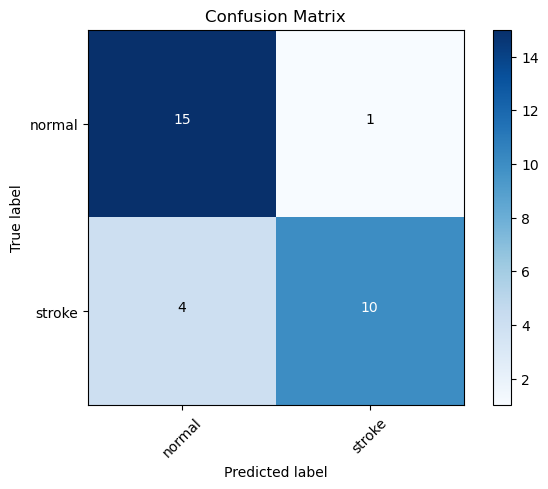

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools

predictions = model.predict(x=X_test, verbose=0)
np.round(predictions)
cm = confusion_matrix(
    y_true=y_test, y_pred=np.argmax(predictions, axis=-1)
)

tn, fp, fn, tp = cm.ravel()

sensitivity = tp/(tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

cm_plot_labels = ["normal","stroke"]
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title = "Confusion Matrix")


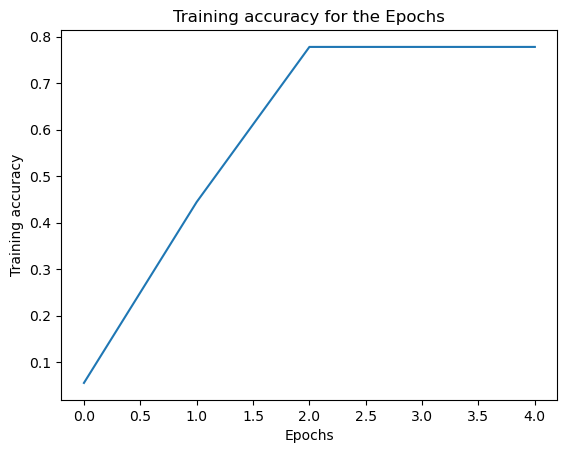

In [52]:
plt.plot(fit_info.history["accuracy"])
plt.title('Training accuracy for the Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training accuracy')

plt.show()

In [20]:
from sklearn import decomposition, svm

rbf = svm.SVC(kernel='rbf', gamma=0.9, C=0.1).fit(X_train, y_train)
rbf_pred = rbf.predict(X_test)
svm_score = classification_report(y_test, rbf_pred)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print(svm_score)

Accuracy (RBF Kernel):  46.67
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.47      1.00      0.64        14

    accuracy                           0.47        30
   macro avg       0.23      0.50      0.32        30
weighted avg       0.22      0.47      0.30        30



C:\Users\marcu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Sensitivity: 1.0
Specificity: 0.0
Confusion matrix, without normalization
[[ 0 16]
 [ 0 14]]


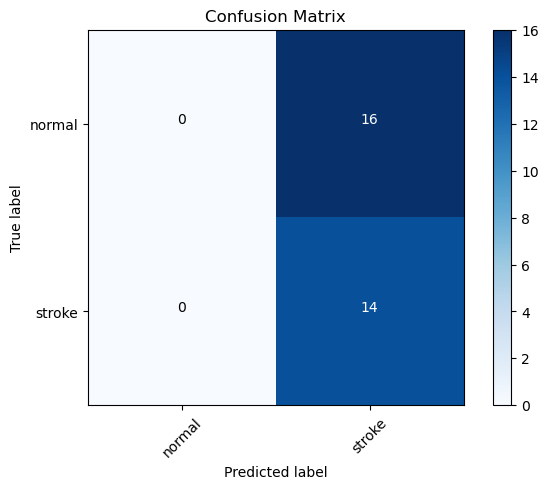

In [18]:
np.round(rbf_pred)

cm = confusion_matrix(y_true=y_test, y_pred=rbf_pred)

# extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm.ravel()

# calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

cm_plot_labels = ["normal", "stroke"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

In [23]:
from keras.applications.resnet import ResNet152, ResNet50, ResNet101
from keras.models import Model
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from keras.optimizers import Adam, SGD
from PIL import Image
from keras.layers import (
    Conv2D,
    MaxPool2D,
    Flatten,
    Dense,
    InputLayer,
    Activation,
    BatchNormalization,
    GlobalAveragePooling2D,
    Dropout,
    RandomFourierFeatures,
    Input,
)

param_grid = {
    'learning_rate': [0.0001, 0.001],
    'hidden_layers': [1, 2],
}
combinations = [[0,0], [0,1], [1,0], [1,1]]

#buffert = listofrp[0]
#listofrp[0] = listofrp[2]
#listofrp[2] = buffert

y_rp = np.array(vidvalue)
X_rp3 = np.array(listofrp)

# Resize images to 32x32
resized_images = []
for image in X_rp3:
    grayscale_image = image.squeeze(axis=0).astype('uint8')
    img = Image.fromarray(grayscale_image, mode='L')
    resized_img = img.resize((224,224))
    resized_np_img = np.array(resized_img)
    resized_images.append(resized_np_img)

# Convert the list of resized images back to NumPy array
X_rp_resized = np.array(resized_images)

# Reshape input data to match the model's input shape
#X_rp_resized = np.expand_dims(X_rp_resized, axis=-1)

# Normalize the pixel values between 0 and 1
X_rp_resized = X_rp_resized.astype('float32')

# Update the input shape
input_shape = (224,224,1)

X_rp_train, X_rp_test, y_rp_train, y_rp_test = train_test_split(
    X_rp_resized, y_rp, test_size=0.25, random_state=42)
#X_train, X_test = X_train / 1080.0, X_test / 1080.0
print(X_rp_train)
print(y_rp_train)
#Gammalt

y_rp_train2 = y_rp_train
y_rp_test2 = y_rp_test

X_rp_train = tf.convert_to_tensor(X_rp_train, dtype=tf.float32)
y_rp_train = tf.convert_to_tensor(y_rp_train, dtype=tf.float32)

y_rp_train = to_categorical(y_rp_train, num_classes=2)
y_rp_test = to_categorical(y_rp_test, num_classes=2)

scores_resnet = []
models_resnet = []

for i in combinations:
    lr = param_grid['learning_rate'][i[0]]
    layers = param_grid['hidden_layers'][i[1]]
    print("Learning rate:", lr)
    print("Layers:", layers)

    # Create the base ResNet50 model
    base_model = ResNet152(weights=None, include_top=False, input_shape=input_shape)

    # Add a global average pooling layer and a dense layer with softmax activation for classification
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    for i in range(layers):
        x = Dense(128, activation="relu")(x)
    predictions = Dense(2, activation="softmax")(x)

    # Define the model to be trained with the ResNet50 base and the classification layers added
    model_resnet = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the base ResNet50 layers so they are not updated during training
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model with a learning rate of 0.001 and a categorical cross-entropy loss function
    model_resnet.compile(
        optimizer=Adam(lr=lr), loss="categorical_crossentropy", metrics=["accuracy"]
    )

    model_resnet.fit(X_rp_train, y_rp_train,
           batch_size=25,
           epochs=3,
           verbose=1,
           validation_data=(X_rp_test, y_rp_test))
    score = model_resnet.evaluate(X_rp_test,y_rp_test, verbose=0)

    print("Test loss: {}, Test accuracy {}".format(score[0], score[1]))
    
    scores_resnet.append(score)
    models_resnet.append(model_resnet)

print(scores_resnet)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]]]
[0 1 0 1 0

Sensitivity: 0.0
Specificity: 1.0
Confusion matrix, without normalization
[[16  0]
 [14  0]]


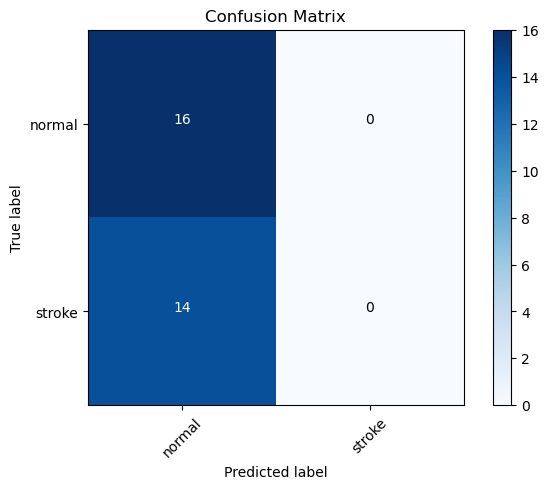

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools

predictions = models_resnet[0].predict(x=X_rp_test, verbose=0)
np.round(predictions)
cm = confusion_matrix(
    y_true=y_rp_test2, y_pred=np.argmax(predictions,axis=-1)
)

tn, fp, fn, tp = cm.ravel()

sensitivity = tp/(tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

cm_plot_labels = ["normal","stroke"]
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title = "Confusion Matrix")
